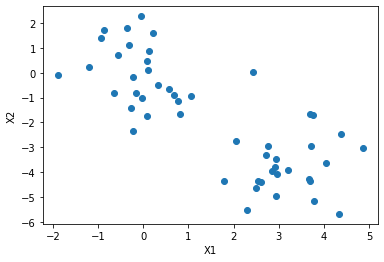

In [3]:
import numpy as np
X = np.random.randn(50,2)
X[0:25,0] = X[0:25,0]+3
X[0:25,1] = X[0:25,1]-4
import matplotlib.pyplot as plt
plt.plot(X[:,0],X[:,1],'o')
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


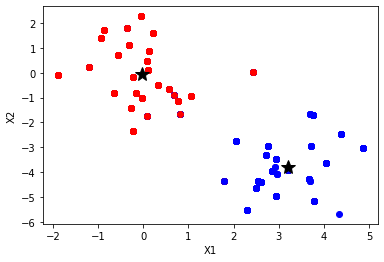

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans ( n_clusters = 2 ,random_state = 100 ).fit(X)
for i in range (0,X.shape[0]):
    if kmeans.labels_[i]==0:
        plt.plot(X[i:,0],X[i:,1],"o",color="red")
    else:
        plt.plot(X[i:,0],X[i:,1],"o",color="blue")
centroid1=kmeans.cluster_centers_[0]
centroid2=kmeans.cluster_centers_[1]
plt.plot(centroid1[0],centroid1[1],"*",color="black",markersize=15)
plt.plot(centroid2[0],centroid2[1],"*",color="black",markersize=15)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [21]:
import pandas as pd
dfHCV=pd.read_csv('HCVdata.csv',sep=';', index_col=0)
print(dfHCV.shape)
print(dfHCV.head)

(567, 12)
<bound method NDFrame.head of           Category Sex  Age   ALB    ALT    AST   BIL    CHE  CHOL   CREA  \
1    0=Blood Donor   m   32  38.5    7.7   22.1   7.5   6.93  3.23  106.0   
2    0=Blood Donor   m   32  38.5   18.0   24.7   3.9  11.17  4.80   74.0   
3    0=Blood Donor   m   32  46.9   36.2   52.6   6.1   8.84  5.20   86.0   
4    0=Blood Donor   m   32  43.2   30.6   22.6  18.9   7.33  4.74   80.0   
5    0=Blood Donor   m   32  39.2   32.6   24.8   9.6   9.15  4.32   76.0   
..             ...  ..  ...   ...    ...    ...   ...    ...   ...    ...   
611    3=Cirrhosis   f   62  32.0    5.9  110.3  50.0   5.57  6.30   55.7   
612    3=Cirrhosis   f   64  24.0    2.9   44.4  20.0   1.54  3.02   63.0   
613    3=Cirrhosis   f   64  29.0    3.5   99.0  48.0   1.66  3.63   66.7   
614    3=Cirrhosis   f   46  33.0   39.0   62.0  20.0   3.56  4.20   52.0   
615    3=Cirrhosis   f   59  36.0  100.0   80.0  12.0   9.07  5.30   67.0   

       GGT  PROT  
1     12.1  69.0

K-means_clusters    0    1  2   3
Real_groups                      
0=Blood Donor     252  244  0   0
1=Hepatitis         1   20  0   2
2=Fibrosis          3   17  0   0
3=Cirrhosis         3    4  3  18
51.15


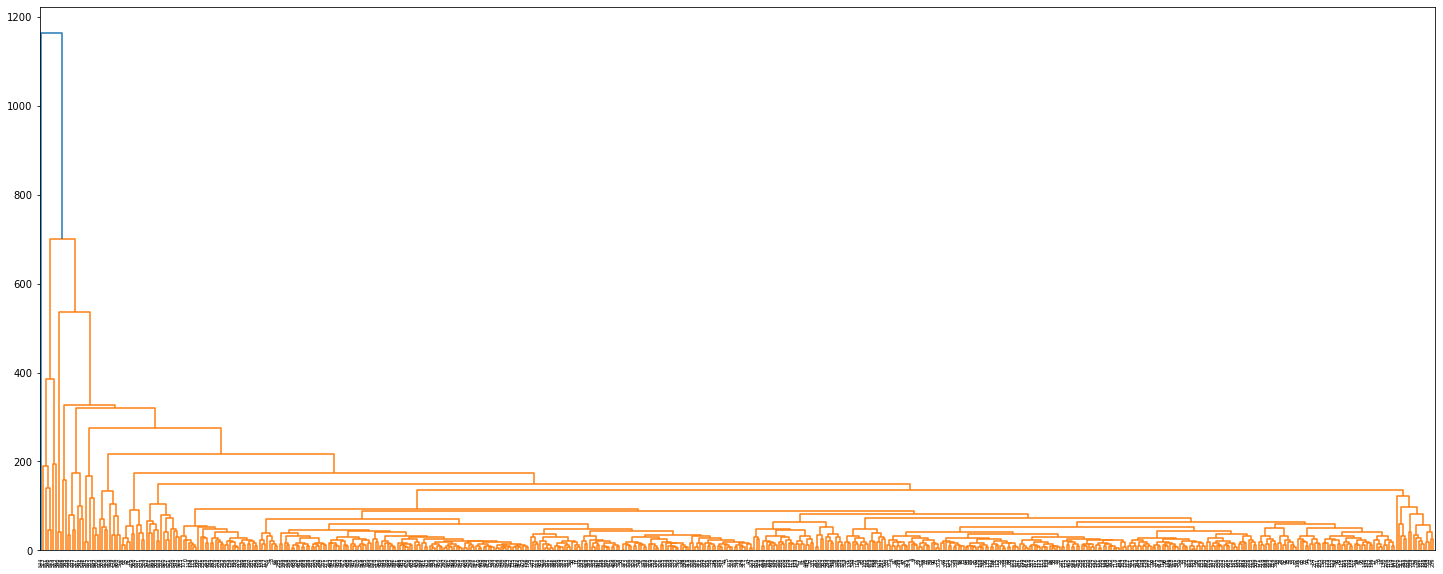

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [25]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
scaler = StandardScaler()
dfHVC_scaled = scaler.fit_transform(dfHCV[['Age', 'ALB', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL','CREA', 'GGT', 'PROT']])
dfHVC_Kmeans4=KMeans(n_clusters=4,n_init=50,random_state=1000).fit(dfHVC_scaled)
dfHVC_Kmeans4_labels = dfHVC_Kmeans4.labels_
dfHVC_labels = dfHCV.Category
test = pd.crosstab(index=dfHVC_labels,columns = dfHVC_Kmeans4_labels,rownames = ['Real_groups'],colnames = ['K-means_clusters'])
print(test)
accuracy_kmeans_4 = sum(test[i][i] for i in range(len(test)))/(dfHVC_labels.shape[0])*100
print(round(accuracy_kmeans_4,2))
dfHCV = dfHCV.drop(["Category", "Sex"], 1)
hc_complete = linkage(dfHCV, "complete")

plt.figure(figsize=(25, 10))
dendrogram(hc_complete)
plt.show()

print(cut_tree(hc_complete, n_clusters=2).T)